In [3]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

import operator
import matplotlib.pyplot as plt


def plot_cut_2mers(datafr, cut_mat) :
    cut_mer2 = {}

    seqs = list(datafr['seq'].values)
    seqs = np.array(seqs, dtype=np.object)

    total_count = np.array(datafr['total_count'])

    cx = sp.coo_matrix(cut_mat)

    for i,j,v in zip(cx.row, cx.col, cx.data) :
        seq = seqs[i]

        mer2 = seq[j-1:j+1]
        if mer2 not in cut_mer2 :
            cut_mer2[mer2] = 0
        cut_mer2[mer2] += v

    cut_mer2_sorted = sorted(cut_mer2.items(), key=operator.itemgetter(1))

    mer2_list = []
    mer2_vals = []
    for i in range(0, len(cut_mer2_sorted)) :
        mer2_list.append(cut_mer2_sorted[i][0])
        mer2_vals.append(cut_mer2_sorted[i][1])

    f = plt.figure(figsize=(6, 4))

    plt.bar(mer2_list, mer2_vals, color='black')

    plt.title('Proximal cleavage dinuc.', fontsize=14)
    plt.xlabel('Dinucleotide', fontsize=14)
    plt.ylabel('Read count', fontsize=14)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.show()

In [2]:
library_name = 'array_noacut_score_50'
library_version = 'unfiltered'

In [3]:
data = pd.read_pickle('unprocessed_data/d.pkl')

In [6]:
data[data.gene.str.contains('FOXP3')]

,N20,seq,exp,gene,info,CUT_SSW,n,lib
73636,TTCGATTTTCAGATTATCTG,ACTACTCATCTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '35:A>C'}","[[261, 56], [260, 60], [262, 25], [262, 60], [...",85,LoFi
73637,TTCGATTTTCAGATTATCTG,ACTACTCATCTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '35:A>C'}","[[254, 60], [262, 58], [260, 58], [260, 58], [...",80,HiFi
74595,TAGCTAACTCCGTTCACCGA,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTATCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '68:G>T'}","[[259, 60], [260, 60], [260, 56], [260, 58], [...",438,LoFi
74596,TAGCTAACTCCGTTCACCGA,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTATCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '68:G>T'}","[[47, 17], [263, 60], [243, 14], [244, 11], [2...",897,HiFi
79473,CCATGCGGCGACCAATCTTT,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '125:A>C'}","[[258, 60], [261, 40], [245, 11], [259, 60], [...",466,LoFi
79474,CCATGCGGCGACCAATCTTT,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '125:A>C'}","[[255, 53], [255, 44], [261, 48], [7, 9], [7, ...",339,HiFi
79973,GGAGGTACGCCAGGTGCGTC,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '117:G>T'}","[[261, 58], [260, 60], [255, 56], [244, 11], [...",252,LoFi
79974,GGAGGTACGCCAGGTGCGTC,ACTACTCATTTATTTGGGATCCAAGGCCCCCAACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '117:G>T'}","[[261, 53], [266, 9], [246, 11], [260, 51], [2...",661,HiFi
81590,AGAGCTACATGCAGGAGTAT,ACTACTCATTTATTTGGGATCCAAGGCCCCCTACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '57:G>T'}","[[260, 60], [264, 16], [259, 56], [262, 58], [...",995,LoFi
81591,AGAGCTACATGCAGGAGTAT,ACTACTCATTTATTTGGGATCCAAGGCCCCCTACCCACAGTACCGT...,acmg_apadb,FOXP3.1,"{'variant': 'mutant', 'position': '57:G>T'}","[[244, 11], [278, 15], [260, 18], [266, 9], [7...",850,HiFi


In [4]:
emitted_proximal_count = []
emitted_distal_count = []
emitted_total_count = []
emitted_seq = []
emitted_mask = []
emitted_lib = []
emitted_lib_index = []
emitted_sublib = []
emitted_sublib_index = []
emitted_experiment = []
emitted_gene = []
emitted_subexperiment = []
emitted_array_version = []
emitted_barcode = []
emitted_master_seq = []

proximal_cuts = sp.lil_matrix((len(data), 206)) #PAS CSE starts at 70

up_constant = 'ATGGGCTGGGAGGCCTCCTCCGAGCGGATGTACCCCGAGGACGGCGCCCTGAAGGGCGAGATCAAGCAGAGGCTGAAGCTGAAGGACGGCGGCCACTACGACGCTGAGGTCAAGACCACCTACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCT'
dn_constant = 'GGAGCAGATACTGGCTTAACTATGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCATCGCATTGTCTGAGTAGGTGTCATTCTATTCTGGGGGGTGGGGTGGGGCAGGACAGCAAGGGGGAGGATTGGGAAGACAATAGCAGGCATGCTGGGGACGACGGTGCTCGAAGCAGCGCAAAACGCCTAACCCTAAGCAGATTCTTCATGCAATTGTC'

up_constant_dataframe = ''
up_constant_metadata = up_constant[-180:]

dn_constant_dataframe = dn_constant[:22]
dn_constant_metadata = dn_constant[22:22 + 120]

In [5]:

#Store library meta data

df_metadata = pd.DataFrame(
    {
        'library' : ['array'],
        'library_index' : [40],
        'sublibrary' : ['array'],
        'sublibrary_index' : [40],
        'upstream_padding' : [up_constant_metadata],
        'downstream_padding' : [dn_constant_metadata]
    }
)

df_metadata = df_metadata[['library', 'library_index', 'sublibrary', 'sublibrary_index', 'upstream_padding', 'downstream_padding']]

df_metadata.to_csv(library_name + '_metadata.csv', header=True, index=False, sep=',')



In [6]:
move_cut_to_non_a = True

cut_score_filter = 50

for index, row in data.iterrows() :
    if index % 100000 == 0:
        print("Read up to sequence: " + str(index))

    master_seq = row['seq']
    barcode = row['N20']

    seq = barcode + master_seq
    mask = 'N' * len(seq)

    cut_mat = row['CUT_SSW']
    
    proximal_count = 0
    distal_count = 0
    total_count = 0
    
    full_seq = up_constant_dataframe + seq + dn_constant_dataframe
    full_mask = ('X' * len(up_constant_dataframe)) + mask + ('X' * len(dn_constant_dataframe))

    for j in range(0, cut_mat.shape[0]) :
        cutpos = int(cut_mat[j, 0]) + 70
        cutscore = cut_mat[j, 1]
        if cutscore >= cut_score_filter :
            total_count += 1

            if cutpos >= 206 :
                distal_count += 1
            else :
                proximal_count += 1

                if move_cut_to_non_a :
                    jj_char = 0
                    while full_seq[cutpos - 1] == 'A' and jj_char < 2 and cutpos > 0 :
                        cutpos -= 1
                        jj_char += 1

                proximal_cuts[index, cutpos] += 1

    #Emit 5' Proximal PAS variant

    #Sequence length 206
    emitted_seq.append(full_seq)
    emitted_mask.append(full_mask)
    
    emitted_lib.append('array')
    emitted_lib_index.append(40)
    emitted_sublib.append('array')
    emitted_sublib_index.append(40)

    emitted_proximal_count.append(proximal_count)
    emitted_distal_count.append(distal_count)
    emitted_total_count.append(total_count)
    
    #Extra array dimensions
    emitted_experiment.append(row['exp'])
    emitted_gene.append(row['gene'])
    emitted_subexperiment.append(row['info'])
    emitted_array_version.append(row['lib'].lower())
    emitted_barcode.append(barcode)
    emitted_master_seq.append(master_seq)

Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000
Read up to sequence: 400000


In [7]:

#Inflate dataframe

df = pd.DataFrame({'seq'  : emitted_seq,
                    'mask'  : emitted_mask,
                    'proximal_count'  : emitted_proximal_count,
                    'distal_count'  : emitted_distal_count,
                    'total_count'  : emitted_total_count,
                    'library'  : emitted_lib,
                    'library_index'  : emitted_lib_index,
                    'sublibrary'  : emitted_sublib,
                    'sublibrary_index'  : emitted_sublib_index,
                    'experiment'  : emitted_experiment,
                    'subexperiment'  : emitted_subexperiment,
                    'gene'  : emitted_gene,
                    'array_version'  : emitted_array_version,
                    'barcode'  : emitted_barcode,
                    'master_seq'  : emitted_master_seq,
                })


In [8]:

#Simultaneously sort dataframe and cut matrices

total_count = np.array(df['total_count'])
sort_index = np.argsort(total_count)

df = df.iloc[sort_index].reset_index(drop=True)
proximal_cuts = proximal_cuts[sort_index]


In [9]:

#Filter final version on read count

total_count = np.array(df['total_count'])
filter_index = np.nonzero(total_count >= 1)[0]

df = df.iloc[filter_index].reset_index(drop=True)
proximal_cuts = proximal_cuts[filter_index]

print(len(df))
print(proximal_cuts.shape[0])


444220
444220


In [10]:

#Store dataframe and cut matrices

df = df[['seq', 'mask', 'proximal_count', 'distal_count', 'total_count', 'library', 'library_index', 'sublibrary', 'sublibrary_index', 'experiment', 'subexperiment', 'gene', 'array_version', 'barcode', 'master_seq']]

df.to_csv(library_name + '_' + library_version + '.csv', header=True, index=False, sep=',')

spio.savemat(library_name + '_' + library_version + '_cuts', {'cuts' : proximal_cuts})


In [6]:

#Read dataframe and cut matrices

df = pd.read_csv(library_name + '_' + library_version + '.csv', delimiter=',').reset_index(drop=True)

proximal_cuts = spio.loadmat(library_name + '_' + library_version + '_cuts.mat')['cuts']

print(len(df))


444220


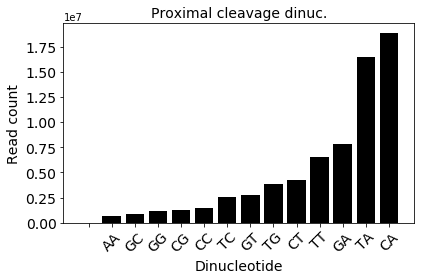

In [7]:
plot_cut_2mers(df, proximal_cuts)

In [8]:
import regex as re

#Filter dataframe and cut matrices

misprime_regexes = [
    re.compile(r"(AAAAAAAAAAAA){s<=1}"),
    re.compile(r"(AAAAAAAAAAAAAAAA){s<=2}"),
    re.compile(r"(AAAAAAAAAAAAAAAAAAAA){s<=3}")
]

keep_index = []
for index, row in df.iterrows() :
    if index % 100000 == 0:
        print("Read up to sequence: " + str(index))
    
    curr_seq = row['seq']
    
    internal_priming = False
    for misprime_regex in misprime_regexes :
        if re.search(misprime_regex, curr_seq) :
            internal_priming = True
            break
    
    if not internal_priming :
        keep_index.append(index)


df_cleaned = df.iloc[keep_index].reset_index(drop=True)

proximal_cuts_cleaned = proximal_cuts[keep_index]

print(len(df_cleaned))
print(proximal_cuts_cleaned.shape[0])


Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000
Read up to sequence: 400000
365156
365156


In [9]:
#Store dataframe and cut matrices
library_version = 'cleaned'

df_cleaned.to_csv(library_name + '_' + library_version + '.csv', header=True, index=False, sep=',')

spio.savemat(library_name + '_' + library_version + '_cuts', {'cuts' : proximal_cuts_cleaned})

In [10]:
#Read dataframe and cut matrices
library_version = 'cleaned'

df_cleaned = pd.read_csv(library_name + '_' + library_version + '.csv', delimiter=',').reset_index(drop=True)

proximal_cuts_cleaned = spio.loadmat(library_name + '_' + library_version + '_cuts.mat')['cuts']

print(len(df_cleaned))

365156


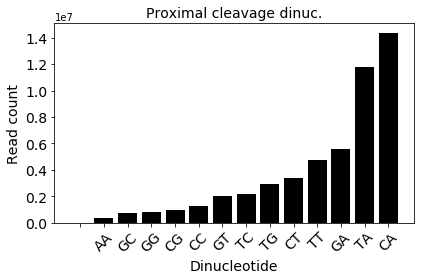

In [11]:
plot_cut_2mers(df_cleaned, proximal_cuts_cleaned)

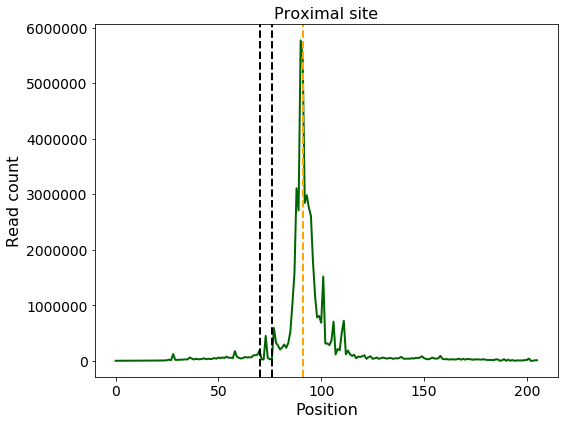

In [12]:

proximal_profile = np.ravel(proximal_cuts_cleaned.sum(axis=0))

f = plt.figure(figsize=(8, 6))

plt.plot(np.arange(len(proximal_profile)), proximal_profile, c='darkgreen', linewidth=2)

#Proximal 1
plt.axvline(x=70, linewidth=2, c='black', linestyle='--')
plt.axvline(x=70 + 6, linewidth=2, c='black', linestyle='--')
plt.axvline(x=70 + 21, linewidth=2, c='orange', linestyle='--')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Position', fontsize=16)
plt.ylabel('Read count', fontsize=16)
plt.title('Proximal site', fontsize=16)
plt.tight_layout()

plt.show()


In [13]:

#Filter final version on read count

total_count = np.array(df_cleaned['total_count'])
filter_index = np.nonzero(total_count >= 10)[0]

df_final = df_cleaned.iloc[filter_index].reset_index(drop=True)
proximal_cuts_final = proximal_cuts_cleaned[filter_index]

print(len(df_final))
print(proximal_cuts_final.shape[0])


358978
358978


In [14]:
#Store dataframe and cut matrices
library_version = 'final'

df_final.to_csv(library_name + '_' + library_version + '.csv', header=True, index=False, sep=',')

spio.savemat(library_name + '_' + library_version + '_cuts', {'cuts' : proximal_cuts_final})

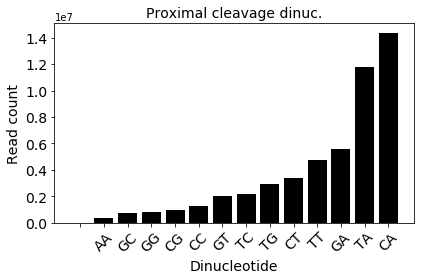

In [15]:
plot_cut_2mers(df_final, proximal_cuts_final)

In [16]:
#Deflate and map rows to wt sequences

library_name = 'array_noacut_score_50'
library_version = 'final2'

In [17]:
#Read dataframe and cut matrices
folder_path = 'processed_data/' + library_version + '/'

df = pd.read_csv(folder_path + library_name + '_' + library_version + '.csv', delimiter=',').reset_index(drop=True)

cuts = spio.loadmat(folder_path + library_name + '_' + library_version + '_cuts.mat')['cuts']

print(len(df))

358978


In [18]:
def str_to_dict(dict_str) :
    dict_parts = dict_str[1:-1].split(',')
    
    inflated_dict = {}
    
    #print(dict_str)
    #print(dict_parts)
    
    for dict_part in dict_parts :
        inflated_key = dict_part.split(':')[0].strip()[1:-1]
        inflated_val = dict_part.split(':')[1].strip()
        
        if inflated_val[0] == "'" and inflated_val[-1] == "'" :
            inflated_val = inflated_val[1:-1]
        
        inflated_dict[inflated_key] = inflated_val
    
    return inflated_dict

emitted_subexperiment = []
emitted_variant = []

emitted_sitetype = []
emitted_clinvar_id = []
emitted_in_acmg = []
emitted_significance = []

emitted_predicted_usage = []
emitted_predicted_logodds = []

for index, row in df.iterrows() :
    if index % 100000 == 0:
        print("Read up to sequence: " + str(index))
    
    experiment_dict = row['subexperiment']
    experiment = row['experiment']
    
    subexp = ''
    variant = ''
    
    sitetype = 'Missing'
    clinvar_id = 'Missing'
    in_acmg = False
    significance = 'Missing'
    
    predicted_usage = -np.nan
    predicted_logodds = -np.nan
    
    if experiment in ['max_iso', 'max_cut'] :
        experiment_dict = str_to_dict(experiment_dict)
        
        subexp_parts = experiment_dict['tag'].split('_')
        variant = subexp_parts[-1]
        if variant == 'consensus' :
            variant = 'wt'
        
        subexp = '_'.join(subexp_parts[:-1])
        
        sitetype = 'UTR3'
        clinvar_id = 'Missing'
        in_acmg = False
        significance = 'Missing'
        
        predicted_usage = round(float(experiment_dict['predicted_usage']), 4)
        predicted_logodds = round(float(experiment_dict['predicted_logodds']), 4)
        
    elif experiment in ['acmg_apadb', 'acmg_polyadb', 'clinvar_mut', 'sensitive_genes'] :
        experiment_dict = str_to_dict(experiment_dict)
        
        subexp = row['gene']
        
        variant = experiment_dict['variant']
        if variant == 'mutant' :
            variant = 'snv'
        if variant == 'wildtype' :
            variant = 'wt'
        
        sitetype = 'Missing'
        clinvar_id = 'Missing'
        in_acmg = True
        if experiment in ['clinvar_mut', 'sensitive_genes'] :
            in_acmg = False
        significance = 'Missing'
    
    elif experiment in ['clinvar_wt'] :
        experiment_dict = str_to_dict(experiment_dict)
        
        subexp = row['gene']
        
        variant = 'wt'
        
        sitetype = experiment_dict['var_region']
        clinvar_id = 'Missing'
        in_acmg = experiment_dict['in_acmg']
        if in_acmg == 'Yes' :
            in_acmg = True
        else :
            in_acmg = False
        significance = 'Missing'
    
    elif experiment in ['human variant'] :
        subexp = row['gene']
        
        exp_parts = experiment_dict.split(':')
        
        subexp = exp_parts[0]
        sitetype = exp_parts[1]
        variant = exp_parts[2]
        if variant == 'SNP' :
            variant = 'snv'
        variant = variant.lower()
        
        in_acmg = exp_parts[3]
        if in_acmg == 'Yes' :
            in_acmg = True
        else :
            in_acmg = False
        significance = exp_parts[5]
        
        clinvar_id = ':'.join(exp_parts[9:])
    
    elif experiment in ['intronic_pas'] :
        subexp = row['gene']
        variant = 'wt'
        
        sitetype = 'Intron'
        clinvar_id = 'Missing'
        in_acmg = False
        significance = 'Missing'
    
    elif experiment in ['tgta'] :
        clinvar_id = experiment_dict
        experiment_dict = str_to_dict(experiment_dict.split(',')[0] + '}')
        
        subexp = 'n=' + experiment_dict['n']
        variant = 'tgta'
        
        sitetype = 'UTR3'
        in_acmg = False
        significance = 'Missing'
    
    else :
        print('ERROR! Unmapped experiment: ' + str(experiment))
        break
    
    emitted_subexperiment.append(subexp)
    emitted_variant.append(variant)

    emitted_sitetype.append(sitetype)
    emitted_clinvar_id.append(clinvar_id)
    emitted_in_acmg.append(in_acmg)
    emitted_significance.append(significance)

    emitted_predicted_usage.append(predicted_usage)
    emitted_predicted_logodds.append(predicted_logodds)


df['subexperiment'] = emitted_subexperiment
df['variant'] = emitted_variant

df['sitetype'] = emitted_sitetype
df['clinvar_id'] = emitted_clinvar_id
df['in_acmg'] = emitted_in_acmg
df['significance'] = emitted_significance

df['predicted_usage'] = emitted_predicted_usage
df['predicted_logodds'] = emitted_predicted_logodds


Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000


In [19]:
exp_subexp_wt_dict = {}
exp_subexp_wt_visited = {}

wt_mapping = {}
unique_experiments = df['experiment'].unique()
for experiment in unique_experiments :
    wt_mapping[experiment] = [experiment]

wt_mapping['clinvar_wt'] = wt_mapping['clinvar_wt'] + ['clinvar_mut', 'human variant', 'sensitive_genes', 'acmg_apadb', 'acmg_polyadb']

wt_mapping['acmg_apadb'] = wt_mapping['acmg_apadb'] + ['acmg_polyadb', 'human variant', 'sensitive_genes']
wt_mapping['acmg_polyadb'] = wt_mapping['acmg_polyadb'] + ['acmg_apadb', 'human variant', 'sensitive_genes']


for index, row in df.iterrows() :
    master_seq = row['master_seq']
    varexp = row['experiment']
    subexp = row['subexperiment']
    
    for exp in wt_mapping[varexp] :
        
        if exp not in exp_subexp_wt_dict :
            exp_subexp_wt_dict[exp] = {}
            exp_subexp_wt_visited[exp] = {}

        if subexp not in exp_subexp_wt_dict[exp] :
            exp_subexp_wt_dict[exp][subexp] = []
            exp_subexp_wt_visited[exp][subexp] = {}

        if row['variant'] == 'wt' and master_seq not in exp_subexp_wt_visited[exp][subexp] :
            exp_subexp_wt_dict[exp][subexp].append(master_seq)
            exp_subexp_wt_visited[exp][subexp][master_seq] = True

In [20]:
def hamming_distance(seq1, seq2) :
    dist = 0
    for j in range(0, len(seq1)) :
        if seq1[j] != seq2[j] :
            dist += 1
    
    return dist

#Map variants to wt sequences

mapped_wt_seqs = []

for index, row in df.iterrows() :
    if index % 100000 == 0:
        print("Read up to sequence: " + str(index))
    
    master_seq = row['master_seq']
    exp = row['experiment']
    subexp = row['subexperiment']
    
    candidate_wt_seqs = exp_subexp_wt_dict[exp][subexp]
    
    wt_seq = 'Unmapped'
    
    if row['variant'] == 'wt' :
        wt_seq = master_seq
    else :
        hamming_limit = 50
        if row['variant'] == 'snv' :
            hamming_limit = 1
        
        #Do hamming search (limited linear scan)
        min_hamming_wt_dist = 1000
        min_hamming_wt_seq = 'Unmapped'
        
        for candidate_wt_seq in candidate_wt_seqs :
            hamming_dist = hamming_distance(master_seq, candidate_wt_seq)
            
            if hamming_dist < min_hamming_wt_dist :
                min_hamming_wt_dist = hamming_dist
                min_hamming_wt_seq = candidate_wt_seq
        
        if min_hamming_wt_dist <= hamming_limit :
            wt_seq = min_hamming_wt_seq
    
    
    mapped_wt_seqs.append(wt_seq)


df['wt_seq'] = mapped_wt_seqs


Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000


In [21]:

def get_snv_position(row) :
    var_seq = row['master_seq']
    ref_seq = row['wt_seq']
    
    if ref_seq == 'Unmapped' or row['variant'] != 'snv' :
        return -1
    
    for i in range(0, len(var_seq)) :
        if var_seq[i] != ref_seq[i] :
            return i


df['snv_pos'] = df.apply(get_snv_position, axis=1)

In [22]:
#Store dataframe and cut matrices
library_version = 'final2_mapped'

df.to_csv(library_name + '_' + library_version + '.csv', header=True, index=False, sep=',')


In [23]:

unique_experiments = df['experiment'].unique()

unmapped_count_dict = {}
total_count_dict = {}

for experiment in unique_experiments :
    
    total_count_dict[experiment] = len(df.query("experiment == '" + experiment + "'"))
    unmapped_count_dict[experiment] = len(df.query("experiment == '" + experiment + "' and wt_seq == 'Unmapped'"))
    
    print(experiment)
    print('   Unmapped count = ' + str(unmapped_count_dict[experiment]))
    print('   Total count = ' + str(total_count_dict[experiment]))
    print('   Unmapped fraction = ' + str(round(float(unmapped_count_dict[experiment]) / float(total_count_dict[experiment]), 2)))


acmg_apadb
   Unmapped count = 1316
   Total count = 50655
   Unmapped fraction = 0.03
human variant
   Unmapped count = 4461
   Total count = 21974
   Unmapped fraction = 0.2
tgta
   Unmapped count = 40407
   Total count = 40407
   Unmapped fraction = 1.0
max_cut
   Unmapped count = 197
   Total count = 30654
   Unmapped fraction = 0.01
intronic_pas
   Unmapped count = 0
   Total count = 115306
   Unmapped fraction = 0.0
max_iso
   Unmapped count = 175
   Total count = 18655
   Unmapped fraction = 0.01
sensitive_genes
   Unmapped count = 4834
   Total count = 40935
   Unmapped fraction = 0.12
clinvar_wt
   Unmapped count = 0
   Total count = 12526
   Unmapped fraction = 0.0
acmg_polyadb
   Unmapped count = 317
   Total count = 20530
   Unmapped fraction = 0.02
clinvar_mut
   Unmapped count = 0
   Total count = 7336
   Unmapped fraction = 0.0


In [24]:
library_name = 'array_noacut_score_50'
library_version = 'final2'


In [25]:
#Read dataframe and cut matrices
folder_path = 'processed_data/' + library_version + '/'

df = pd.read_csv(folder_path + library_name + '_' + library_version + '_mapped.csv', delimiter=',').reset_index(drop=True)

cuts = spio.loadmat(folder_path + library_name + '_' + library_version + '_cuts.mat')['cuts']

print(len(df))

358978


In [26]:
#Estimate observed measures per barcode

pPas_cut_start = 77
pPas_cut_end = 107#105#125

pPas_count = np.ravel(sp.csc_matrix(cuts)[:, pPas_cut_start:pPas_cut_end].sum(axis=1))

pseudo_count = 0.0

df['pPas_count'] = pPas_count
df['pPas_usage'] = (df['pPas_count'] + pseudo_count) / (df['total_count'] + pseudo_count)
df['pPas_logodds'] = np.log(df['pPas_usage'] / (1.0 - df['pPas_usage']))

df['pPas_logodds_isnan'] = df['pPas_logodds'].apply(np.isnan)
df['pPas_logodds_isinf'] = df['pPas_logodds'].apply(np.isinf)

pPas_cuts = sp.csr_matrix(sp.csc_matrix(cuts)[:, pPas_cut_start:pPas_cut_end]) / sp.csc_matrix(cuts)[:, pPas_cut_start:pPas_cut_end].sum(axis=1)

df['pPas_avg_cut'] = np.ravel(np.sum(pPas_cuts * np.arange(pPas_cuts.shape[1]).reshape((-1, 1)), axis=1))


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log
/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/base.py:594: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


In [27]:

def filter_dataframe(df, cuts, total_count_filter=100, drop_nans=True) :

    filter_query = "total_count >= " + str(total_count_filter)
    if drop_nans :
        filter_query += " and pPas_logodds_isnan == False and pPas_logodds_isinf == False"

    valid_pPas_df = df.query(filter_query).copy()
    keep_index = np.ravel(valid_pPas_df.index)

    valid_pPas_cuts = cuts[keep_index, :]

    valid_pPas_df = valid_pPas_df.reset_index(drop=True)

    print('Dataframe size = ' + str(len(valid_pPas_df)))
    
    return valid_pPas_df, valid_pPas_cuts


In [28]:

def aggregate_dataframe(df, cuts, groupby_list) :
    
    print('Aggregating with groupby = ' + str(groupby_list))
    
    pseudo_count = 0.0
    
    df_copy = df.copy().reset_index(drop=True)
    
    df_group = df_copy.groupby(groupby_list)
    

    df_copy['n_barcodes'] = df_group['barcode'].transform( lambda x : x.count() )

    df_copy['pooled_pPas_count'] = df_group['pPas_count'].transform( lambda x : x.sum() )
    df_copy['pooled_proximal_count'] = df_group['proximal_count'].transform( lambda x : x.sum() )
    df_copy['pooled_distal_count'] = df_group['distal_count'].transform( lambda x : x.sum() )
    df_copy['pooled_total_count'] = df_group['total_count'].transform( lambda x : x.sum() )

    df_copy['pooled_pPas_usage'] = (df_copy['pooled_pPas_count'] + pseudo_count) / (df_copy['pooled_total_count'] + pseudo_count)
    df_copy['pooled_pPas_logodds'] = np.log(df_copy['pooled_pPas_usage'] / (1.0 - df_copy['pooled_pPas_usage']))

    df_copy['std_pooled_pPas_usage'] = (df_copy['pooled_pPas_usage'] - df_copy['pPas_usage'])**2
    df_copy['std_pooled_pPas_logodds'] = (df_copy['pooled_pPas_logodds'] - df_copy['pPas_logodds'])**2

    df_group = df_copy.groupby(groupby_list)

    df_copy['std_pooled_pPas_usage'] = df_group['std_pooled_pPas_usage'].transform( lambda x : x.sum() )
    df_copy['std_pooled_pPas_usage'] = np.sqrt(df_copy['std_pooled_pPas_usage'] / (df_copy['n_barcodes'] - 1.))
    df_copy['std_pooled_pPas_logodds'] = df_group['std_pooled_pPas_logodds'].transform( lambda x : x.sum() )
    df_copy['std_pooled_pPas_logodds'] = np.sqrt(df_copy['std_pooled_pPas_logodds'] / (df_copy['n_barcodes'] - 1.))

    df_copy['avg_pPas_count'] = df_group['pPas_count'].transform( lambda x : x.mean() )
    df_copy['avg_total_count'] = df_group['total_count'].transform( lambda x : x.mean() )
    df_copy['avg_pPas_usage'] = df_group['pPas_usage'].transform( lambda x : x.mean() )
    df_copy['avg_pPas_logodds'] = df_group['pPas_logodds'].transform( lambda x : x.mean() )
    df_copy['avg_pPas_avg_cut'] = df_group['pPas_avg_cut'].transform( lambda x : x.mean() )

    df_copy['std_pPas_usage'] = df_group['pPas_usage'].transform( lambda x : x.std() )
    df_copy['std_pPas_logodds'] = df_group['pPas_logodds'].transform( lambda x : x.std() )
    df_copy['std_pPas_avg_cut'] = df_group['pPas_avg_cut'].transform( lambda x : x.std() )
    
    print('Calculated statistics.')
    
    #Create grouped dataframe
    picked_keys = {}
    keep_index = []
    for index, row in df_copy.iterrows() :
        row_key = ''
        for key_part in groupby_list :
            row_key += '_' + str(row[key_part])
        
        if row_key not in picked_keys :
            picked_keys[row_key] = len(picked_keys)
            keep_index.append(index)

    df_grouped = df_copy.loc[keep_index].copy().reset_index(drop=True)
    drop_columns = ['barcode', 'pPas_count', 'total_count', 'pPas_usage', 'pPas_logodds', 'pPas_avg_cut']
    if 'array_version' not in groupby_list :
        drop_columns.append('array_version')
    
    df_grouped = df_grouped.drop(columns=drop_columns)
    
    print('Prepared grouped dataframe.')
    
    #Aggregate cut matrices
    
    cuts_dense = np.array(cuts.todense())
    
    cleavage = cuts_dense / (np.reshape(np.sum(cuts_dense, axis=1), (-1, 1)) + np.reshape(np.ravel(df_copy['distal_count']), (-1, 1)))
    
    pooled_counts = np.zeros((len(df_grouped), cuts_dense.shape[1]))
    mean_cleavage = np.zeros((len(df_grouped), cuts_dense.shape[1]))
    
    n_barcodes = np.reshape(np.ravel(df_grouped['n_barcodes']), (-1, 1))
    
    for index, row in df_copy.iterrows() :
        if index % 100000 == 0 :
            print('Processing cuts for barcode ' + str(index))
        
        row_key = ''
        for key_part in groupby_list :
            row_key += '_' + str(row[key_part])
        
        index_grouped = picked_keys[row_key]
        
        pooled_counts[index_grouped, :] += cuts_dense[index, :]
        mean_cleavage[index_grouped, :] += cleavage[index, :]
    
    mean_cleavage /= n_barcodes
    
    pooled_cleavage = pooled_counts / (np.reshape(np.sum(pooled_counts, axis=1), (-1, 1)) + np.reshape(np.ravel(df_grouped['pooled_distal_count']), (-1, 1)))
    
    print('Re-counted matrices.')
    
    return df_grouped, sp.csr_matrix(pooled_counts), sp.csr_matrix(pooled_cleavage), sp.csr_matrix(mean_cleavage)



In [33]:
#Multiplex filter and aggregate for different conditions

for total_count_filter in [100, 10] :
    for drop_nans in [True, False] :

        valid_pPas_df, valid_pPas_cuts = filter_dataframe(df, cuts, total_count_filter=total_count_filter, drop_nans=drop_nans)

        seq_ver_df, seq_ver_pooled_counts, seq_ver_pooled_cleavage, seq_ver_mean_cleavage = aggregate_dataframe(valid_pPas_df, valid_pPas_cuts, ['array_version', 'master_seq'])

        seq_df, seq_pooled_counts, seq_pooled_cleavage, seq_mean_cleavage = aggregate_dataframe(valid_pPas_df, valid_pPas_cuts, ['master_seq'])

        #Store dataframe and cut matrices
        grouped_version = library_version + '_grouped_seq_ver_count_' + str(total_count_filter) + '_dropnans_' + str(drop_nans)

        seq_ver_df.to_csv('array_' + grouped_version + '.csv', header=True, index=False, sep=',')

        spio.savemat('array_' + grouped_version + '_cuts',
                     {
                         'pooled_cuts' : seq_ver_pooled_counts,
                         'pooled_distribution' : seq_ver_pooled_cleavage,
                         'mean_distribution' : seq_ver_mean_cleavage
                     })


        grouped_version = library_version + '_grouped_seq_count_' + str(total_count_filter) + '_dropnans_' + str(drop_nans)

        seq_df.to_csv('array_' + grouped_version + '.csv', header=True, index=False, sep=',')

        spio.savemat('array_' + grouped_version + '_cuts',
                     {
                         'pooled_cuts' : seq_pooled_counts,
                         'pooled_distribution' : seq_pooled_cleavage,
                         'mean_distribution' : seq_mean_cleavage
                     })

Dataframe size = 289343
Aggregating with groupby = ['array_version', 'master_seq']
Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Re-counted matrices.
Aggregating with groupby = ['master_seq']
Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Re-counted matrices.
Dataframe size = 311104
Aggregating with groupby = ['array_version', 'master_seq']


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log


Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Processing cuts for barcode 300000
Re-counted matrices.
Aggregating with groupby = ['master_seq']
Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Processing cuts for barcode 300000
Re-counted matrices.
Dataframe size = 326355
Aggregating with groupby = ['array_version', 'master_seq']
Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Processing cuts for barcode 300000
Re-counted matrices.
Aggregating with groupby = ['master_seq']
Calculated statistics.
Prepared grouped dataframe.
Processing cuts for barcode 0
Processing cuts for barcode 100000
Processing cuts for barcode 200000
Processing cuts for barcode 300000
Re-counted matrices.
Dataf

In [4]:
library_name = 'array_noacut_score_50'
library_version = 'unfiltered'


In [5]:
#Read dataframe and cut matrices
folder_path = 'processed_data/' + library_version + '/'

df = pd.read_csv(folder_path + library_name + '_' + library_version + '_mapped.csv', delimiter=',').reset_index(drop=True)

print(len(df))

444220


In [6]:
import regex as re

#Filter dataframe and cut matrices

misprime_regexes = [
    ('misprime_11_of_12', re.compile(r"(AAAAAAAAAAAA){s<=1}")),
    ('misprime_13_of_16', re.compile(r"(AAAAAAAAAAAAAAAA){s<=3}")),
    ('misprime_16_of_20', re.compile(r"(AAAAAAAAAAAAAAAAAAAA){s<=4}")),
    ('misprime_10_of_12', re.compile(r"(AAAAAAAAAAAA){s<=2}")),
    ('misprime_12_of_16', re.compile(r"(AAAAAAAAAAAAAAAA){s<=4}")),
    ('misprime_15_of_20', re.compile(r"(AAAAAAAAAAAAAAAAAAAA){s<=5}"))
]

misprime_result_dict = {
    'misprime_11_of_12' : [],
    'misprime_13_of_16' : [],
    'misprime_16_of_20' : [],
    'misprime_10_of_12' : [],
    'misprime_12_of_16' : [],
    'misprime_15_of_20' : []
}


for index, row in df.iterrows() :
    if index % 100000 == 0:
        print("Read up to sequence: " + str(index))
    
    curr_seq = row['seq']
    
    internal_priming = False
    for misprime_id, misprime_regex in misprime_regexes :
        if re.search(misprime_regex, curr_seq) :
            misprime_result_dict[misprime_id].append(True)
        else :
            misprime_result_dict[misprime_id].append(False)
    
for misprime_id in misprime_result_dict :
    df[misprime_id] = misprime_result_dict[misprime_id]


Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000
Read up to sequence: 400000


In [7]:
#Store misprime-marked dataframe and cut matrices

df.to_csv(folder_path + library_name + '_' + library_version + '_misprime_mapped.csv', header=True, index=False, sep=',')
